# Análisis de las permutaciones del filtro 'shuffle'

## Definición de las permutaciones

In [1]:
% matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import sqrt, gcd

TYPE_DATA = np.int32
TAM_DATA = TYPE_DATA().dtype.itemsize
SIZE_MAX = 50

## Cálculo de los ordenes de las permutaciones

In [2]:
res = []

for SIZE in np.arange(1,SIZE_MAX):

    data = np.arange(SIZE * TAM_DATA)
    data_out = np.empty([SIZE * TAM_DATA])
    data_orig = data
    perm = []
    for i in range(SIZE * TAM_DATA):
        perm.append(set())

    while np.array_equal(data_orig, data_out) is False:
            chunk = data
            chunk_out = np.empty(SIZE*TAM_DATA)      

            for k in range(TAM_DATA):
                chunk_out[SIZE * k:SIZE * (k+1):] = chunk[k::TAM_DATA]

            for i in range(SIZE*TAM_DATA):
                perm[i].add(chunk_out[i])

            data_out = chunk_out
            data = data_out

    s = set()
    for i, elem in enumerate(perm):
        s.add(tuple(sorted(tuple(elem))))
    perm = sorted(list(s))

    perm_l = []
    for elem in perm:
        perm_l.append(len(elem))

    lcm = perm_l[0]
    for elem in perm_l[1:]:
        lcm = lcm * elem // gcd(lcm, elem)

    res.append(lcm)

## Gráfico de los resultados

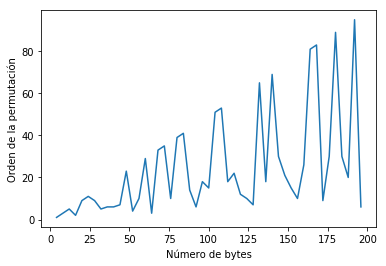

In [4]:
X = np.linspace(1 * TAM_DATA, (SIZE_MAX - 1) * TAM_DATA, SIZE_MAX - 1)
Y = res

plt.plot(X, Y)
plt.xlabel("Número de bytes")
plt.ylabel("Orden de la permutación")
plt.show()

## Conclusiones

Se puede observar que el orden de la permutación nunca llega a ser más de la mitad del número de bytes. 

¿Se puede obtener una función para generar el orden a partir del número de datos y del número de bytes por cada dato?